In [1]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import pandas as pd
import PIL
from PIL import ImageDraw

In [2]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
images = convert_from_path('The European Business Review - NovemberDecember 2021 -1-2.pdf')

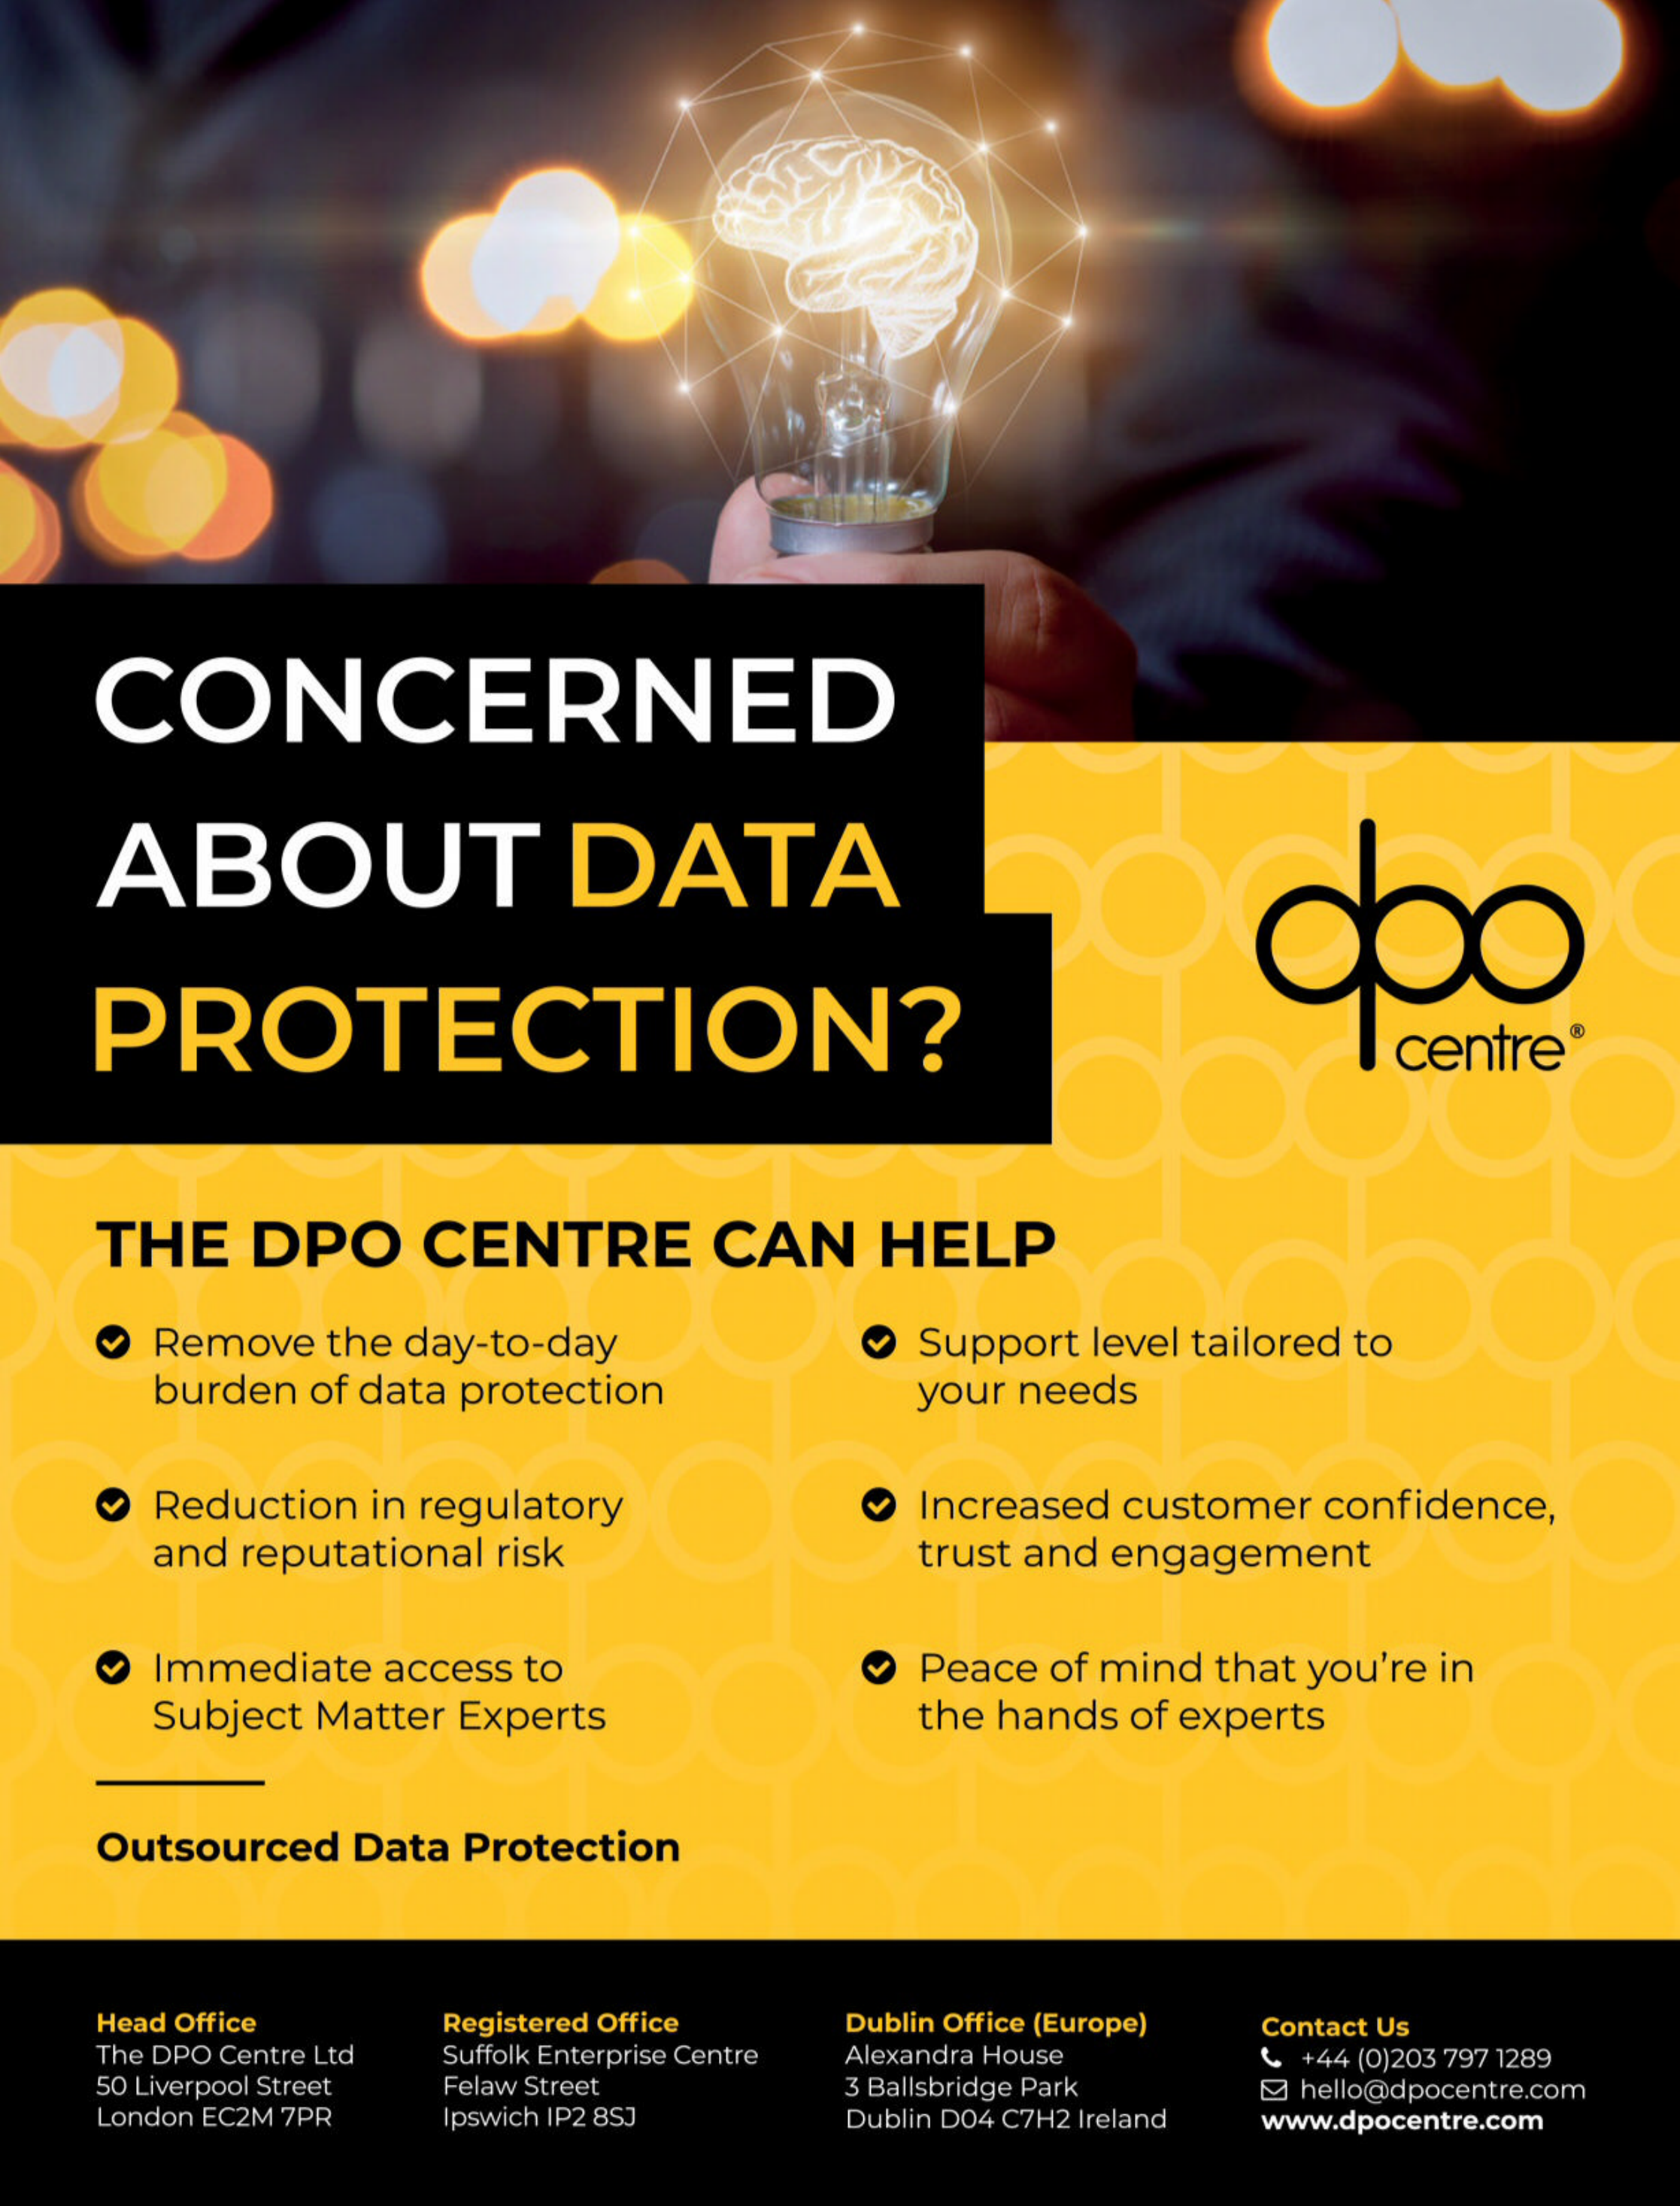

In [12]:
from IPython.display import display, Image
display(images[1])

In [14]:
bounds = reader.readtext(np.array(images[1]),min_size=0,slope_ths=0.2,ycenter_ths=0.7,height_ths=0.6,width_ths=0.8,decoder='beamsearch',beamWidth=10)
bounds

[([[118, 856], [1198, 856], [1198, 1004], [118, 1004]],
  'CONCERNED',
  0.9999117434419689),
 ([[130, 1074], [1202, 1074], [1202, 1223], [130, 1223]],
  'ABOUT DATA',
  0.9796158564224967),
 ([[116, 1293], [1293, 1293], [1293, 1444], [116, 1444]],
  'PROTECTION?',
  0.9995472669779685),
 ([[1843, 1348], [2092, 1348], [2092, 1437], [1843, 1437]],
  'centres',
  0.7492711981672618),
 ([[121, 1609], [1411, 1609], [1411, 1697], [121, 1697]],
  'THE DPO CENTRE CAN HELP',
  0.9182090674182977),
 ([[198, 1754], [829, 1754], [829, 1822], [198, 1822]],
  'Remove the day-to-day',
  0.6871721772113939),
 ([[1213, 1754], [1858, 1754], [1858, 1823], [1213, 1823]],
  'Support level tailored to',
  0.8595496579794686),
 ([[198, 1815], [890, 1815], [890, 1884], [198, 1884]],
  'burden of data protection',
  0.9852960918593568),
 ([[1207, 1816], [1521, 1816], [1521, 1888], [1207, 1888]],
  'your needs',
  0.993736526163698),
 ([[198, 1970], [836, 1970], [836, 2037], [198, 2037]],
  'Reduction in regul

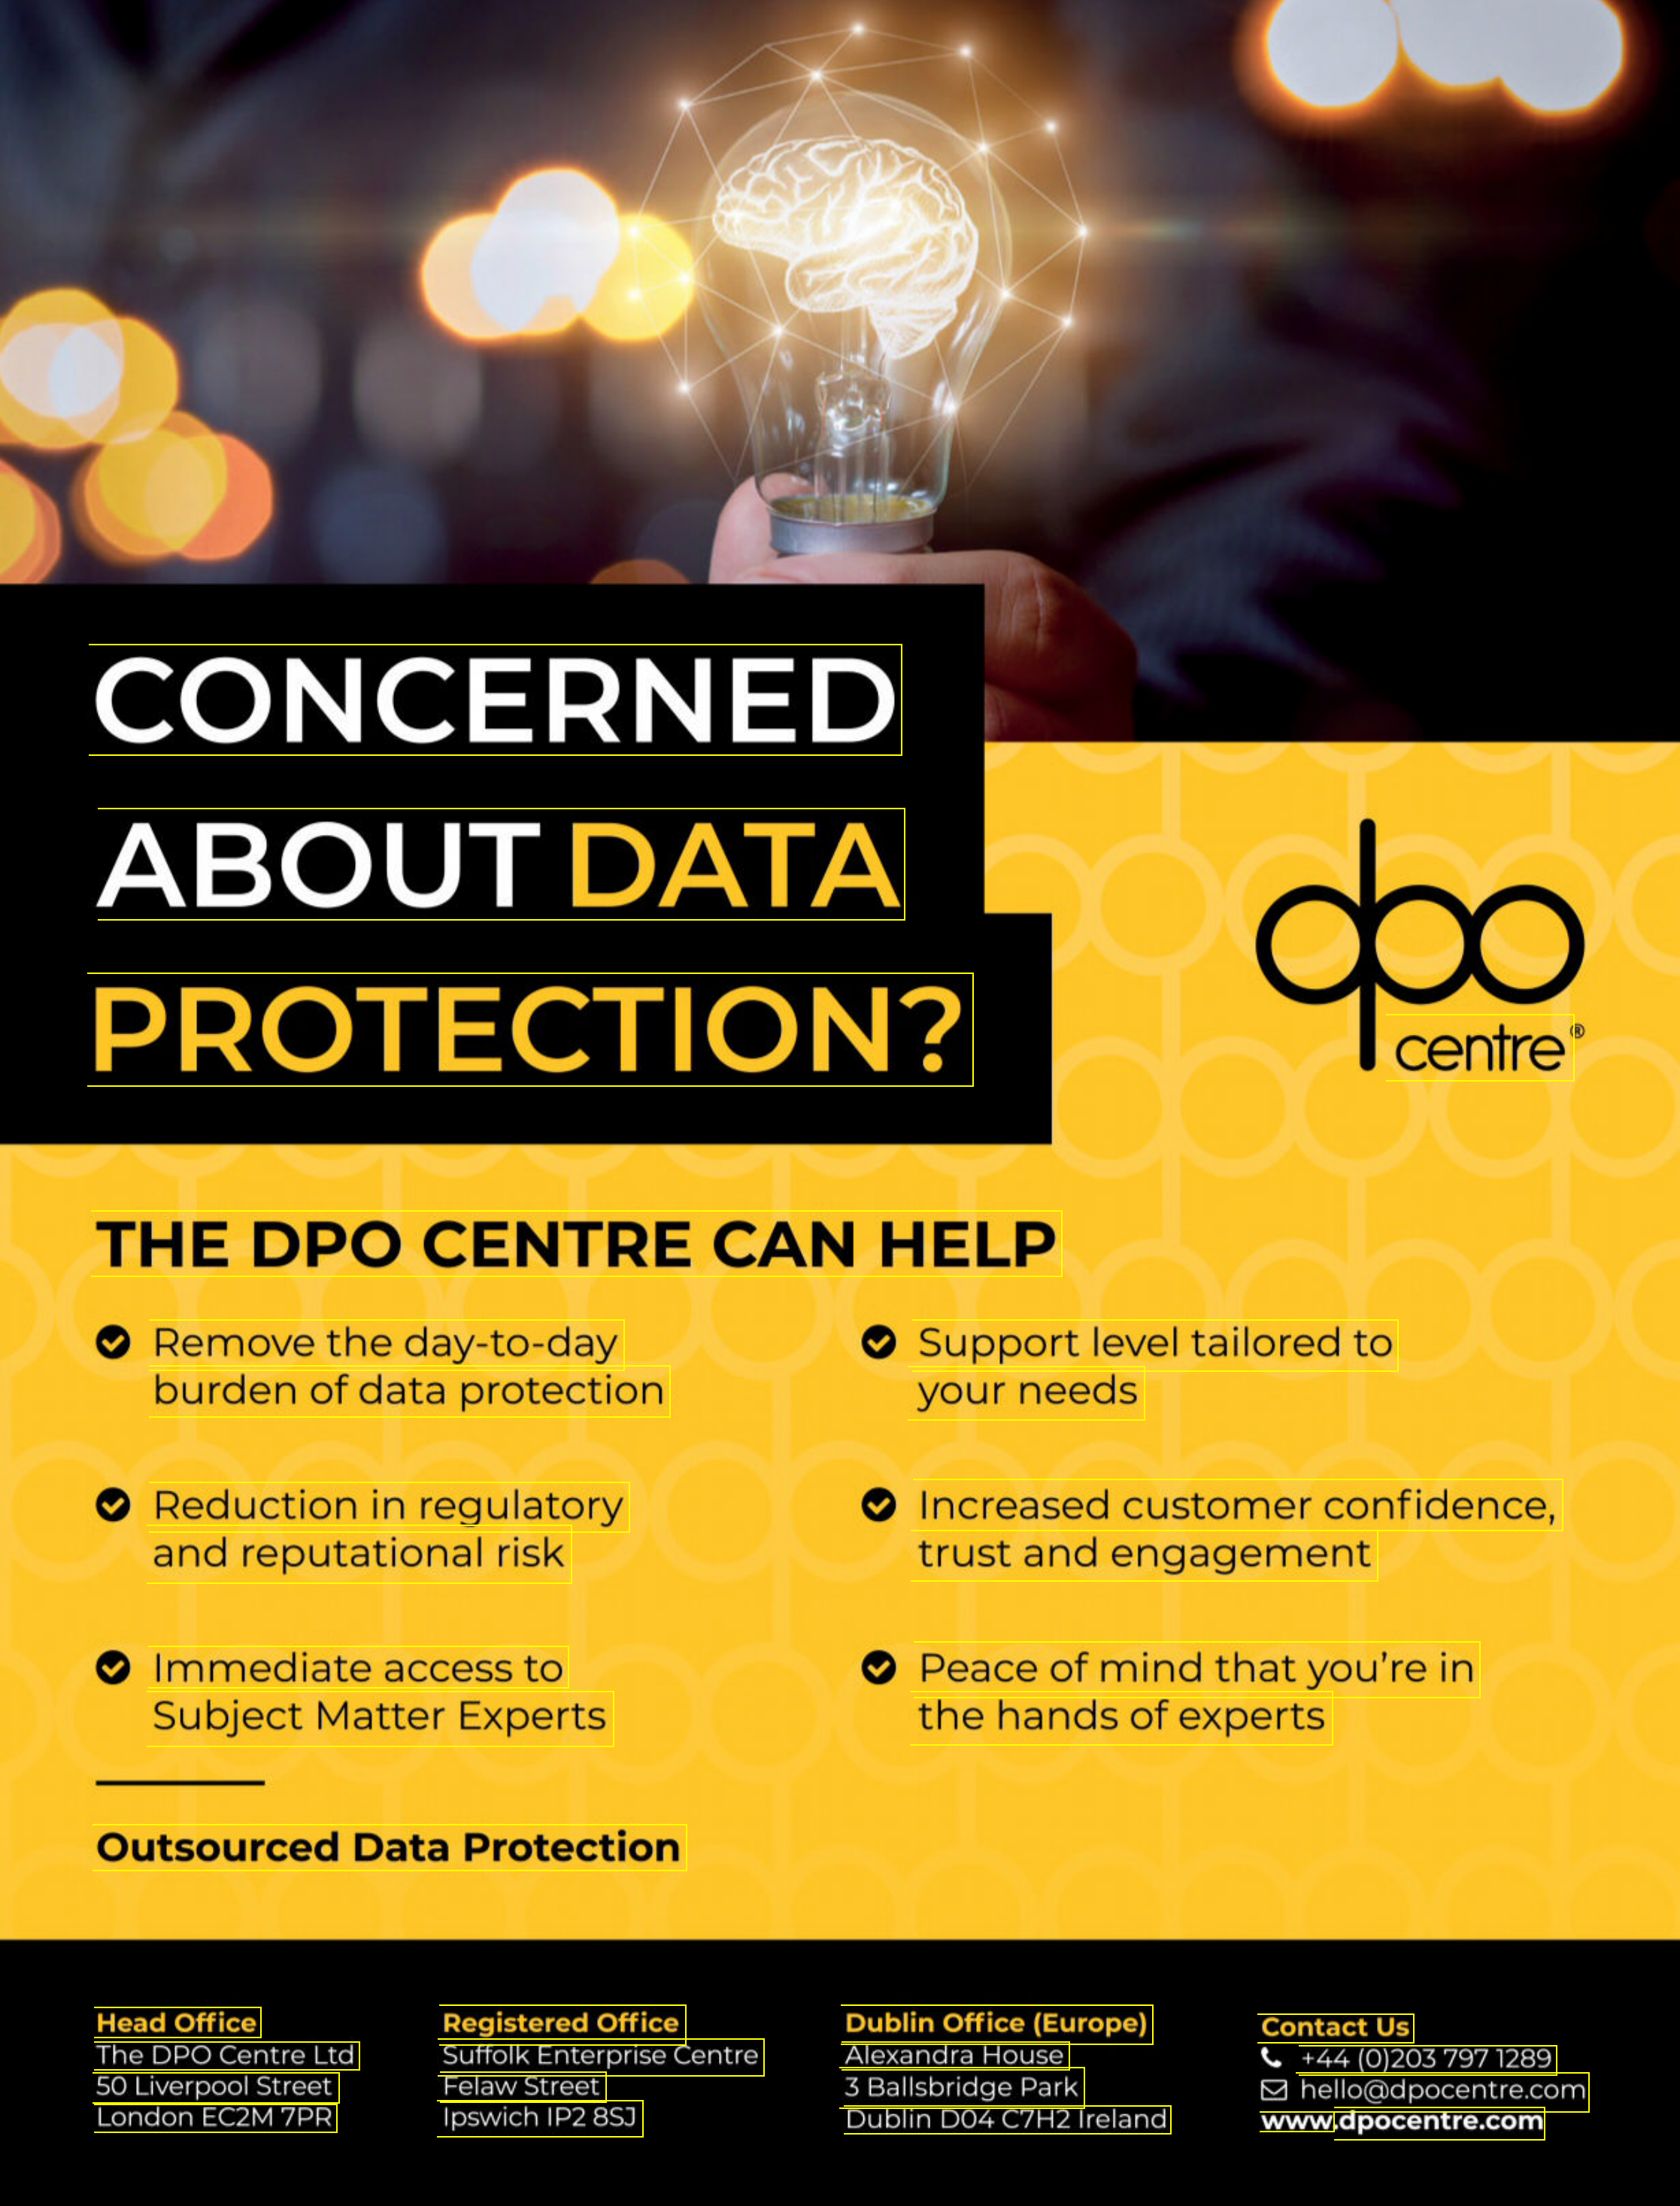

In [15]:
def draw_boxes(image,bounds,color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3],fill=color,width=width)
    return image

draw_boxes(images[1],bounds)
        
    

In [16]:
bounds[1][1]

'ABOUT DATA'

In [17]:
text =''
for i in range(len(bounds)):
    text = text + bounds[i][1] + '\n'
    
print(text)

CONCERNED
ABOUT DATA
PROTECTION?
centres
THE DPO CENTRE CAN HELP
Remove the day-to-day
Support level tailored to
burden of data protection
your needs
Reduction in regulatory
Increased customer confidence,
and reputational risk
trust and engagement
Immediate access to
Peace of mind that you're in
Subject Matter Experts
the hands of experts
Outsourced Data Protection
Head Office
Registered Office
Dublin Office (Europe)
Contact Us
The DPO Centre Ltd
Suffolk Enterprise Centre
Alexandra House
+44 (01203 797 1289
50 Liverpool Street
Felaw Street
3 Ballsbridge Park
hello@dpocentrecom
London ECZM ZPR
Ipswich IP2 85J
Dublin DO4 C7H2 Ireland
WWW
dpocentre com

